In [181]:
import pandas as pd
import random as rd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

A) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación.

In [189]:
pol= np.poly1d([random.randint(2,3),random.randint(2,3),random.randint(2,3)],r=True)

print (pol)

   3     2
1 x - 6 x + 12 x - 8


B) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio

In [187]:
der = pol.deriv()
raices=der.roots.real 
print(raices)

[2.66666667 2.        ]


C) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

In [186]:
dic={} 

for i in range(len(raices)):
    dic[pol(raices[i])] = [raices[i]]

l=np.sort(pol(raices)) 

min= optimize.fmin_powell(pol, dic.get(l[0]), disp=False) 
max= optimize.fmin_powell(-pol, dic.get(l[-1]), disp=False)

print('El punto crítico relacionado con el mínimo global {} corresponde al valor de la minimización {}' .format(dic.get(l[0]),min))
print('El punto crítico relacionado con el máximo global {} corresponde al valor de la minimización {}' .format(dic.get(l[-1]),max))

El punto crítico relacionado con el mínimo global [2.666666666666668] corresponde al valor de la minimización [-1.38941038e+103]
El punto crítico relacionado con el máximo global [1.9999999999999991] corresponde al valor de la minimización [1.06141492e+103]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2621: RuntimeWarning: overflow encountered in multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2620: RuntimeWarning: overflow encountered in multiply
  denom = 2.0 * val
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2621: RuntimeWarning: invalid value encountered in true_divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2614: RuntimeWarning: overflow encountered in multiply
  tmp1 = (xb - xa) * (fb - fc)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2615: RuntimeWarning: overflow encountered in multiply
  tmp2 = (xb - xc) * (fb - fa)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2616: RuntimeWarning: invalid value encountered in subtract
  val = tmp2 - tmp1
/usr/local/lib/python3.7/dist-packages/numpy/

D) Grafique el polinomío inclueyendo los puntos asociados a las raices

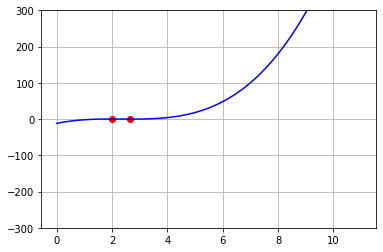

In [188]:


x = np.linspace(0,11,100)


plt.plot(raices,pol(raices),'ro')
plt.plot(x,pol(x),'b-')
plt.ylim(l[0]-300,l[-1]+300)
plt.grid()
plt.show()

In [168]:
import requests
import json
import pandas as pd
import numpy as np
import random

1)  En un notebook de jupyter desarrolle los siguientes pasos


Descargue el JSON con la lista de paises del siguiente link:


https://datahub.io/core/country-list/r/data.json


y escoja aleatoriamente un país


Use los diferentes API endpoints de inspire-hep 


https://inspirehep.net/


 para extraer la lista de investigadores de una institución de ese país  en esa base de datos. 


Para ello:

A) Use el API de institutions para extraer la lista de instituciones del país, por ejemplo: colombia
https://inspirehep.net/api/institutions?q=colombia


Para la primera institución con

number_of_papers > 0


Obtenga el valor

legacy_ICN:


Por ejemplo: 
Colombia, U. Natl.


Si ninguna institución satisface la condición number_of_papers > 0, escoja de nuevo otro país aleatorio y repita el proceso

In [169]:

df=pd.read_json('https://datahub.io/core/country-list/r/data.json')
pais = np.random.choice(df.Name)
dr=requests.get(f'https://inspirehep.net/api/institutions?q={pais}')
U=dr.json()['hits']['hits']
x=0; y=0
pais


'Bahamas'

B) Con el API de literatura obtenga el JSON con los artículos de menos de 10 autores usando el "legacy_ICN" de la siguiente manera

https://inspirehep.net/api/literature?sort=mostrecent&page=1&q=aff+Colombia,+U.+Natl.+and+ac+1->+10


aff: usa el valor de legacy_ICN
and: es un operador lógico
ac: establece los autores entre 1 y 10

In [170]:
name=dr.json()['hits']['hits'][x].get('metadata').get('number_of_papers')
name
print(dr.json()['hits']['hits'][1].get('metadata').get('legacy_ICN'))

Coll. of Bahamas


In [171]:
while x<len(U):
  name=dr.json()['hits']['hits'][x].get('metadata').get('number_of_papers')
  if name>0:
    name1 = dr.json()['hits']['hits'][x].get('metadata').get('legacy_ICN')
    print(name1)
    break
  else: 
    x+=1

Unlisted, BS


In [172]:
cambio = requests.get(f'https://inspirehep.net/api/literature?sort=mostrecent&page=1&q={name1}+and+ac+1-%3E+10')

C) Para al menos un artículo de esa institución, extraiga el URL del perfil de cada autor de esa institución que se encuentra dentro del campo "authors" en "record" y luego en "$ref".

In [173]:
number = len(cambio.json()['hits']['hits'][1].get('metadata').get('authors'))
Ul = []
while y < number:
  cita = cambio.json()['hits']['hits'][1].get('metadata').get('authors')[y]['record'].get('$ref')
  Ul.append(cita)
  print(cita)
  y+=1

https://inspirehep.net/api/authors/1939956
https://inspirehep.net/api/authors/2104051
https://inspirehep.net/api/authors/2104052
https://inspirehep.net/api/authors/1270424


In [174]:
print(Ul)

['https://inspirehep.net/api/authors/1939956', 'https://inspirehep.net/api/authors/2104051', 'https://inspirehep.net/api/authors/2104052', 'https://inspirehep.net/api/authors/1270424']


In [190]:
dic = {'name':[],'correo':[],'inicio':[],'final':[],'rango':[],'institicion':[]}
for i in Ul:
  autor = requests.get(i)
  print(['nombre', autor.json()['metadata']['name'].get('value')])
  dic['name'].append(autor.json()['metadata']['name'].get('value'))
  dic['correo'].append(autor.json()['metadata'].get('email_addresses')[0].get('value'))
  dic['inicio'].append(autor.json().get('create'))
  dic['final'].append(autor.json().get('updated'))
  dic['rango'].append(autor.json()['metadata']['positions'][0].get('rank'))
  dic['institicion'].append(autor.json()['metadata'].get('positions')[0].get('institution'))
print(dic)


dt = pd.DataFrame(data=dic)
dt

['nombre', 'Kim, D.']


TypeError: ignored